<a href="https://colab.research.google.com/github/keshav20004/Deep-Learing/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Day 4 of deep learing


In [77]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aakash50897/churn-modellingcsv")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/aakash50897/churn-modellingcsv/versions/1


In [78]:
!pip install tensorflow


In [79]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.19.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [81]:
dataset = pd.read_csv(path + "/Churn_Modelling.csv")

In [82]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [83]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [84]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [85]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [86]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [87]:
##feature engineering part
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [88]:
X=X.drop(["Geography","Gender"],axis=1)

In [89]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [90]:
X=pd.concat([X,geography,gender],axis=1)

In [91]:
##Splitting the  dataset into traing and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [93]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [94]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [95]:
X_train.shape

(8000, 11)

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU
from tensorflow.keras.layers import Dropout

In [97]:
##LEta initilize the ANN
classifier=Sequential()

In [101]:
##Adding the inpout layer
classifier.add(Dense(units=11,activation="relu"))

In [103]:
##adding the 1st hidden layer
classifier.add(Dense(units=6,activation="relu"))
classifier.add(Dropout(0.3))

In [105]:
classifier.add(Dense(units=6,activation="relu"))
classifier.add(Dropout(0.2))

In [106]:
##adding the o/p layer\
classifier.add(Dense(1,activation="sigmoid"))

In [107]:
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [108]:
##early stopping
import keras
import tensorflow as tf
early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [109]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [110]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8010 - loss: 0.5172 - val_accuracy: 0.8103 - val_loss: 0.4412
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8078 - loss: 0.4446 - val_accuracy: 0.8285 - val_loss: 0.4050
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8214 - loss: 0.4104 - val_accuracy: 0.8338 - val_loss: 0.4039
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8296 - loss: 0.4128 - val_accuracy: 0.8277 - val_loss: 0.3891
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8470 - loss: 0.3743 - val_accuracy: 0.8349 - val_loss: 0.3979
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8276 - loss: 0.4141 - val_accuracy: 0.8160 - val_loss: 0.4117
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8432 - loss: 0.3991 - val_accuracy: 0.8319 - val_loss: 0.3822
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8399 - loss: 0.3847 -

In [64]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

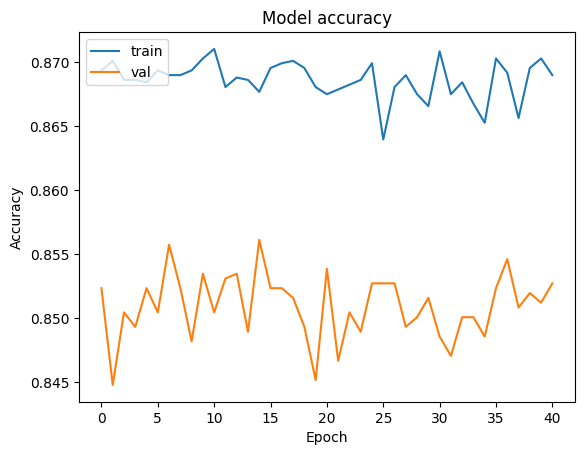

In [66]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()


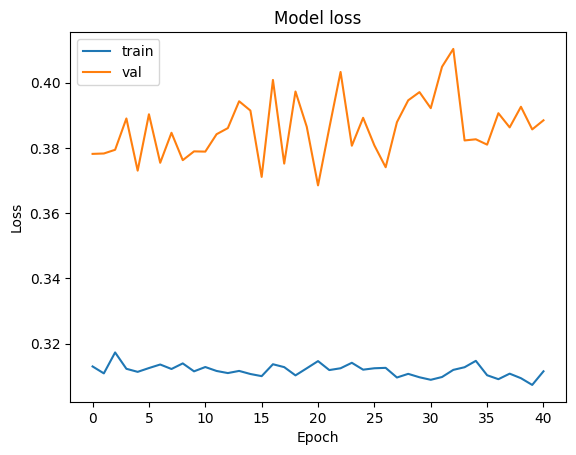

In [67]:
#summarsise history for the loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [68]:
#prediction of the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [72]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1529   66]
 [ 205  200]]


In [73]:
##cal the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [74]:
score

0.8645

In [75]:
##get the weights in the pickel file
classifier.get_weights()

[array([[-1.0085558 ,  0.0516143 ,  1.2471273 , -1.2052934 ,  0.12775643,
         -0.5626714 ,  1.6923825 , -3.349811  , -0.6235034 , -0.1833364 ,
          0.918278  ],
        [ 0.2096348 ,  4.072565  , -6.360911  ,  3.7546039 ,  1.6595817 ,
         -5.1897926 , -3.6129158 ,  2.612182  ,  2.5552175 , -0.40095648,
         -1.9969664 ],
        [-0.5600028 , -0.6226038 ,  1.3836049 ,  1.7639598 ,  0.8020923 ,
          0.9418869 ,  1.2056891 , -0.3035527 ,  1.5693191 ,  0.68038726,
          2.1061485 ],
        [ 2.0843997 , -1.9093531 ,  1.9344482 , -1.1747932 ,  0.60583127,
         -0.9628018 , -4.5968804 , -6.257975  ,  2.0995984 , -5.95727   ,
          1.9952564 ],
        [ 4.787921  , -0.2523315 ,  0.04583096, -0.11588182,  5.963516  ,
         -0.02434243, -1.1883383 , -0.8447632 , -4.963133  , -5.8928804 ,
          0.6450166 ],
        [ 0.6473852 , -0.8950618 , -0.69151413,  1.0799611 , -0.38043875,
          0.05343823, -1.8917431 ,  0.5085988 , -1.1322769 ,  0.0113793